In [1]:
!pip install gdown
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [2]:
# !gdown "15TamVQlus9WLGb7LeLCEIiMqd_FtGdPb" -O "Chess.zip"
# !unzip "Chess.zip" -d "/content/"

!gdown "1WcVUO5-CN8vlzvJAsDO3NgTGsdt74I5o" -O "Biscuit_Dataset.zip"
!unzip "Biscuit_Dataset.zip" -d "/content/"

Output streaming akan dipotong hingga 5000 baris terakhir.
   creating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (1).jpg  
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (10).jpg  
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (11).jpg  
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (12).jpg  
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (13).jpg  
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (14).jpg  
  inflating: /content/Biscuit_Dataset/Bhagwati Choco Vanilla Puff Biscuits/Bhagwati Choco Vanilla Puff Biscuits (15).jpg  
  inf

# **Library**

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input


In [4]:
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
# NUM_CLASSES = 6
# DATASET_PATH = "/content/Chess/"
# CLASSES = [
#     "Bishop",
#     "King",
#     "Knight",
#     "Pawn",
#     "Queen",
#     "Rook"
# ]

NUM_CLASSES = 101
DATASET_PATH = "/content/Biscuit_Dataset/"
CLASSES = [
    "Americana",
    "Amul Chocolate",
    "Amul Elaichi Rusk",
    "Bhagwati Choco Vanilla Puff Biscuits",
    "Bhagwati Lemony Puff Biscuits",
    "Bisk Farm Sugar Free Biscuits",
    "Bonn Jeera Bite Biscuits",
    "Britannia 50-50 Maska Chaska",
    "Britannia 50-50 Maska Chaska Salted Biscuits",
    "Britannia 50-50 Potazos - Masti Masala",
    "Britannia 50-50 Sweet and Salty Biscuits",
    "Britannia 50-50 Timepass Classic Salted Biscuit",
    "Britannia Biscafe Coffee Cracker",
    "Britannia Bourbon",
    "Britannia Bourbon The Original Cream Biscuits",
    "Britannia Chocolush - Pure Magic",
    "Britannia Good Day - Chocochip Cookies",
    "Britannia Good Day Cashew Almond Cookies",
    "Britannia Good Day Harmony Biscuit",
    "Britannia Good Day Pista Badam Cookies",
    "Britannia Little Hearts",
    "Britannia Marie Gold Biscuit",
    "Britannia Milk Bikis Milk Biscuits",
    "Britannia Nice Time - Coconut Biscuits",
    "Britannia Nutri Choice Oats Cookies - Chocolate and Almonds",
    "Britannia Nutri Choice Oats Cookies - Orange With Almonds",
    "Britannia Nutri Choice Seed Biscuits",
    "Britannia Nutri Choice Sugar Free Cream Cracker Biscuits",
    "Britannia Nutrichoice Herbs Biscuits",
    "Britannia Tiger Glucose Biscuit",
    "Britannia Tiger Kreemz - Chocolate Cream Biscuits",
    "Britannia Tiger Kreemz - Elaichi Cream Biscuits",
    "Britannia Tiger Kreemz - Orange Cream Biscuits",
    "Britannia Tiger Krunch Chocochips Biscuit",
    "Britannia Treat Chocolate Cream Biscuits",
    "Britannia Treat Crazy Pineapple Cream Biscuit",
    "Britannia Treat Jim Jam Cream Biscuit",
    "Britannia Treat Osom Orange Cream Biscuit",
    "Britannia Vita Marie Gold Biscuits",
    "Cadbury Bournvita Biscuits",
    "Cadbury Chocobakes Choc Filled Cookies",
    "Cadbury Oreo Chocolate Flavour Biscuit Cream Sandwich",
    "Cadbury Oreo Strawberry Flavour Creme Sandwich Biscuit",
    "Canberra Big Orange Cream Biscuits",
    "CookieMan Hand Pound Chocolate Cookies",
    "Cremica Coconut Cookies",
    "Cremica Elaichi Sandwich Biscuits",
    "Cremica Jeera Lite",
    "Cremica Non-Stop Thin Potato Crackers - Baked, Crunchy Masala",
    "Cremica Orange Sandwich Biscuits",
    "Krown Black Magic Cream Biscuits",
    "MARIO Coconut Crunchy Biscuits",
    "McVities Bourbon Cream Biscuits",
    "McVities Dark Cookie Cream",
    "McVities Marie Biscuit",
    "Parle 20-20 Cashew Cookies",
    "Parle 20-20 Nice Biscuits",
    "Parle Happy Happy Choco-Chip Cookies",
    "Parle Hide and Seek",
    "Parle Hide and Seek - Black Bourbon Choco",
    "Parle Hide and Seek - Milano Choco Chip Cookies",
    "Parle Hide and Seek Caffe Mocha Cookies",
    "Parle Hide and Seek Chocolate and Almonds",
    "Parle Krack Jack Original Sweet and Salty Cracker Biscuit",
    "Parle Krackjack Biscuits",
    "Parle Magix Sandwich Biscuits - Chocolate",
    "Parle Milk Shakti Biscuits",
    "Parle Monaco Biscuit - Classic Regular",
    "Parle Monaco Piri Piri",
    "Parle Platina Hide and Seek Creme Sandwich - Vanilla",
    "Parle-G Gold Gluco Biscuits",
    "Parle-G Original Gluco Biscuits",
    "Patanjali Doodh Biscuit",
    "Priyagold Butter Delite Biscuits",
    "Priyagold Cheese Chacker Biscuits",
    "Priyagold CNC Biscuits",
    "Priyagold Snacks Zig Zag Biscuits",
    "Richlite Rich Butter Cookies",
    "RiteBite Max Protein 7 Grain Breakfast Cookies - Cashew Delite",
    "Sagar Coconut Munch Biscuits",
    "Sri Sri Tattva Cashew Nut Cookies",
    "Sri Sri Tattva Choco Hazelnut Cookies",
    "Sri Sri Tattva Coconut Cookies",
    "Sri Sri Tattva Digestive Cookies",
    "Sunfeast All Rounder - Cream and Herb",
    "Sunfeast All Rounder - Thin, Light and Crunchy Potato Biscuit",
    "Sunfeast Bounce Creme Biscuits",
    "Sunfeast Bounce Creme Biscuits - Elaichi",
    "Sunfeast Bounce Creme Biscuits - Pineapple Zing",
    "Sunfeast Dark Fantasy - Choco Creme",
    "Sunfeast Dark Fantasy Bourbon Biscuits",
    "Sunfeast Dark Fantasy Choco Fills",
    "Sunfeast Glucose Biscuits",
    "Sunfeast Moms Magic - Fruit and Milk Cookies",
    "Sunfeast Moms Magic - Rich Butter Cookies",
    "Sunfeast Moms Magic - Rich Cashew and Almond Cookies",
    "Tasties Chocochip Cookies",
    "Tasties Coconut Cookies",
    "UNIBIC Choco Chip Cookies",
    "UNIBIC Pista Badam Cookies",
    "UNIBIC Snappers Potato Crackers"
]

# **EDA**

Total number of images: 5058


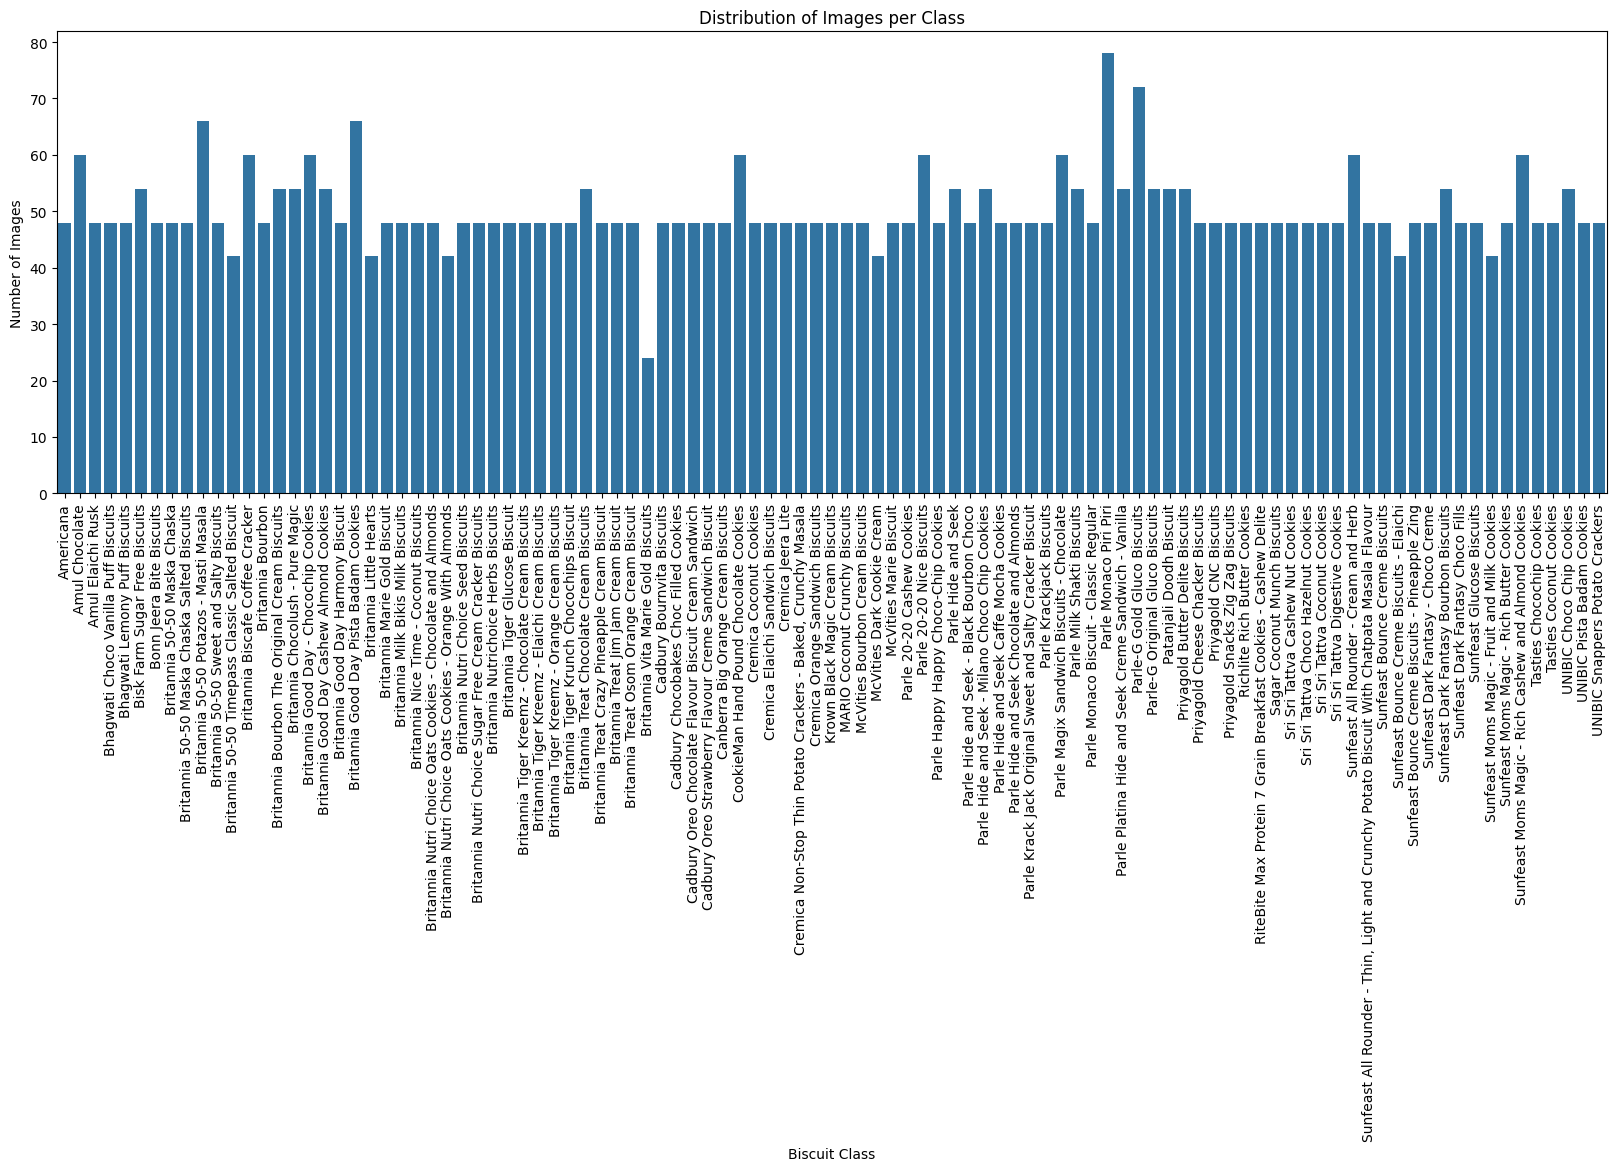

In [5]:
data_dir = pathlib.Path(DATASET_PATH)
image_count = len(list(data_dir.glob('*/*.jpg'))) # Assuming images are .jpg
print(f"Total number of images: {image_count}")

class_counts = {}
for class_name in CLASSES:
  class_dir = data_dir / class_name
  class_counts[class_name] = len(list(class_dir.glob('*.jpg')))

plt.figure(figsize=(20, 6))  # Adjust figure size for better readability
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Biscuit Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.show()

# **Augmentasi**

In [6]:
# desired_total_images = 500
desired_total_images = 5500
images_per_class = desired_total_images // len(CLASSES)
remainder = desired_total_images % len(CLASSES)

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class and augment images
for i, class_name in enumerate(CLASSES):
    class_dir = data_dir / class_name
    current_images = len(list(class_dir.glob('*.jpg')))
    images_to_generate = images_per_class - current_images
    if i < remainder:
        images_to_generate +=1
    if images_to_generate > 0:
      print(f"Augmenting {class_name}: Generating {images_to_generate} images")
      for filename in class_dir.glob('*.jpg'):
          img = tf.keras.preprocessing.image.load_img(filename, target_size=(IMG_HEIGHT, IMG_WIDTH))
          x = tf.keras.preprocessing.image.img_to_array(img)
          x = x.reshape((1,) + x.shape)

          # Generate new images
          for j in range(images_to_generate):
            if j >= current_images:
                break
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=str(class_dir), save_prefix=f'{filename.stem}_augmented_{j}', save_format='jpg'):
                i += 1
                if i >= 1:  # Generate only one augmented image per original
                    break

Augmenting Americana: Generating 7 images
Augmenting Amul Elaichi Rusk: Generating 7 images
Augmenting Bhagwati Choco Vanilla Puff Biscuits: Generating 7 images
Augmenting Bhagwati Lemony Puff Biscuits: Generating 7 images
Augmenting Bisk Farm Sugar Free Biscuits: Generating 1 images
Augmenting Bonn Jeera Bite Biscuits: Generating 7 images
Augmenting Britannia 50-50 Maska Chaska: Generating 7 images
Augmenting Britannia 50-50 Maska Chaska Salted Biscuits: Generating 7 images
Augmenting Britannia 50-50 Sweet and Salty Biscuits: Generating 7 images
Augmenting Britannia 50-50 Timepass Classic Salted Biscuit: Generating 13 images
Augmenting Britannia Bourbon: Generating 7 images
Augmenting Britannia Bourbon The Original Cream Biscuits: Generating 1 images
Augmenting Britannia Chocolush - Pure Magic: Generating 1 images
Augmenting Britannia Good Day Cashew Almond Cookies: Generating 1 images
Augmenting Britannia Good Day Harmony Biscuit: Generating 7 images
Augmenting Britannia Little Heart

In [7]:
print(f"Total number of images after augmentation: {len(list(data_dir.glob('*/*.jpg')))}")

Total number of images after augmentation: 30126


# **CNN**

In [11]:
model = Sequential([
    # Layer Convolutional 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Dropout lebih kecil pada awal jaringan

    # Layer Convolutional 2
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Dropout bertambah sesuai kedalaman jaringan

    # Layer Convolutional 3
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),  # Dropout lebih tinggi di bagian akhir

    # Flatten dan Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),  # Neuron lebih banyak di Dense pertama
    Dropout(0.5),  # Regularisasi di Dense Layer
    Dense(NUM_CLASSES, activation='softmax')  # Output sesuai jumlah kelas
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Adjust validation split

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 24147 images belonging to 101 classes.
Found 5979 images belonging to 101 classes.


In [13]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Evaluate the model (replace with your test data)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Important for correct evaluation metrics
)

loss, accuracy = model.evaluate(test_generator, steps = 241524//BATCH_SIZE) # Evaluate on the entire test set
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


755/755 ━━━━━━━━━━━━━━━━━━━━ 153s 183ms/step - accuracy: 0.0415 - loss: 4.4482 - val_accuracy: 0.2751 - val_loss: 2.7540
Epoch 2/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 122s 160ms/step - accuracy: 0.3218 - loss: 2.4176 - val_accuracy: 0.6382 - val_loss: 1.2040
Epoch 3/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 122s 161ms/step - accuracy: 0.6228 - loss: 1.1999 - val_accuracy: 0.8120 - val_loss: 0.6570
Epoch 4/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 141s 159ms/step - accuracy: 0.7472 - loss: 0.7725 - val_accuracy: 0.8394 - val_loss: 0.4929
Epoch 5/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 143s 161ms/step - accuracy: 0.8186 - loss: 0.5390 - val_accuracy: 0.8542 - val_loss: 0.4360
Epoch 6/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 122s 161ms/step - accuracy: 0.8586 - loss: 0.4281 - val_accuracy: 0.8976 - val_loss: 0.3395
Epoch 7/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 123s 162ms/step - accuracy: 0.8786 - loss: 0.3654 - val_accuracy: 0.8953 - val_loss: 0.3141
Epoch 8/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 124s 163ms/step - accuracy: 0.9027 - loss: 0.30

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [14]:
# Predict on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes



942/942 ━━━━━━━━━━━━━━━━━━━━ 103s 109ms/step


                                                                                            precision    recall  f1-score   support

                                                                                 Americana       0.99      0.98      0.99       384
                                                                            Amul Chocolate       1.00      0.97      0.98        60
                                                                         Amul Elaichi Rusk       1.00      1.00      1.00       384
                                                      Bhagwati Choco Vanilla Puff Biscuits       1.00      1.00      1.00       384
                                                             Bhagwati Lemony Puff Biscuits       0.97      1.00      0.98       384
                                                             Bisk Farm Sugar Free Biscuits       0.99      0.96      0.98       108
                                                                  Bonn Jeer

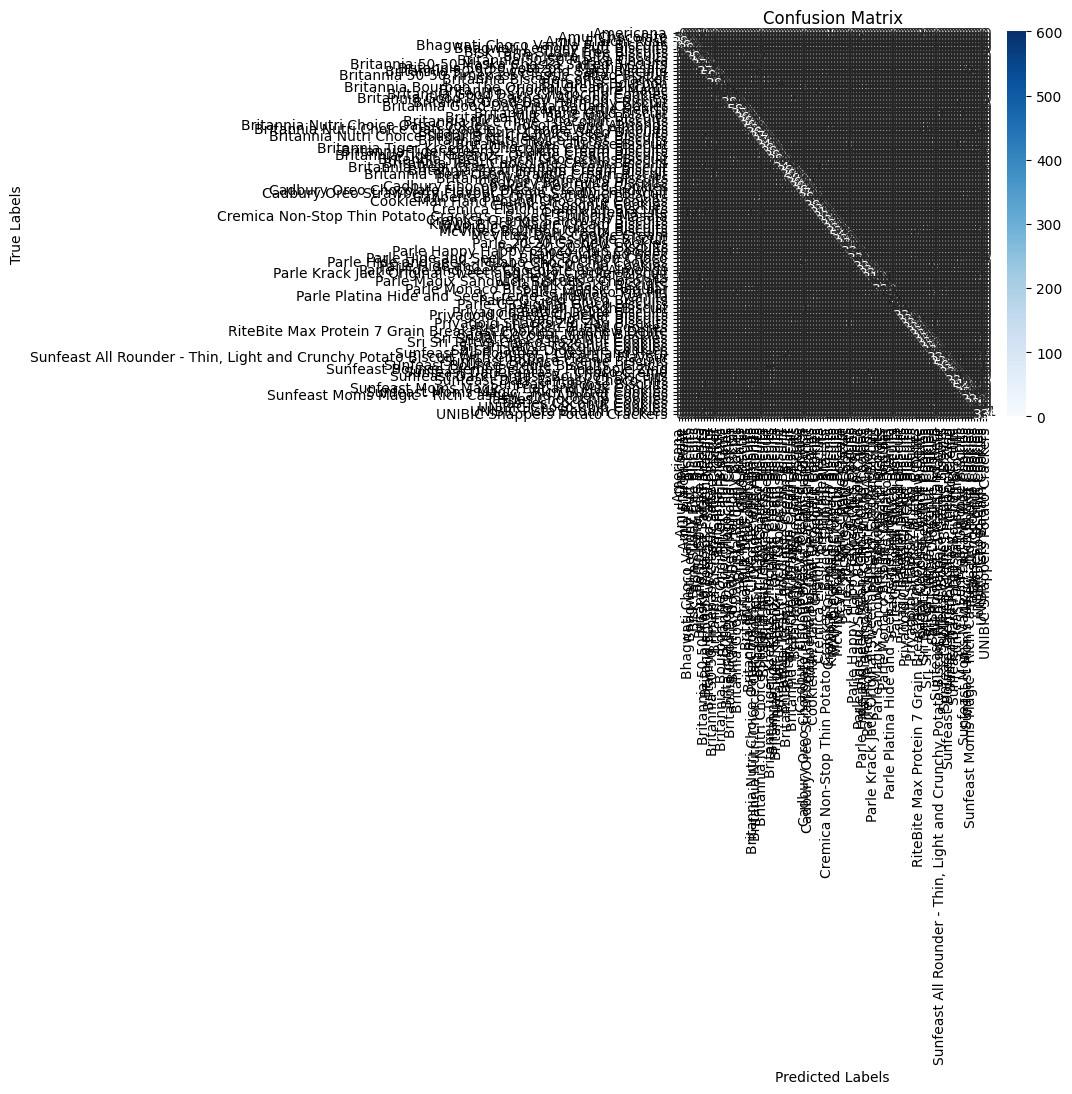

In [15]:
# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=CLASSES)
print(report)

# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 5))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


# **Save Model**

In [17]:
model.save('cnn_model.h5')
# model_vgg.save('vgg16_model.h5')
# model_resnet.save('resnet50_model.h5')
# model_efficientnet.save('efficientnet_model.h5')
# model_mobilenet.save('mobilenet_model.h5')